## Student Name: 

---

# Tutorial 1 - Part A: Descriptive statistics

All the parts that require action (either in the code or equations) are flagged by `<your turn>` or $\color{red}{<your~turn>}$

In [1]:
import numpy as np
import scipy.stats as st
from scipy.optimize import fsolve
from scipy.integrate import quad
import matplotlib.pylab as plt
import matplotlib.colors as colors

# Setting plot fonts
plt.rc('font', family='serif')

# Below is a set of colors for matplotlib that is color-vision-defiency friendly.
# To use them in plotting commands, you can simply set "color=colorset[N]",
# where N is an integer in [0,16), reflecting the index of the colors below.
colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

## Properties of PDFs

We are going to define an arbitrary function which may be a PDF and study its properties.

In [2]:
def my_pdf(x, a):
    """
    x: independent variable
    
    a: a shape parameter
    """
    return 2 * st.norm.pdf(x) * st.norm.cdf(a*x)

Assume $a=-10$ and perform the following analyses.

### Plot the PDF.

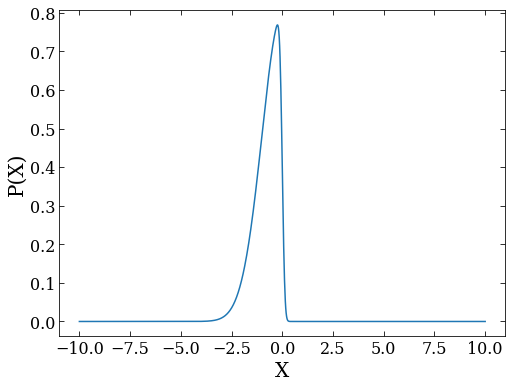

In [3]:
# <your turn> : define variables and calculations you may need here.
x = np.linspace(-10,10,1000)
y = my_pdf(x,-10)

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here.

ax.plot(x,y)


# Plot cosmetics - feel free to edit.
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('P(X)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True);

### Use the Kolomogrov axioms and show that the function defined above can be a PDF.

In [4]:
# <your turn>

pdf_integral = quad(my_pdf,-100,100, args=(-10))[0]

print(f'The function integral = {round(pdf_integral,2)}')

The function integral = 1.0


### Calculate the expectation value, standard deviation, kurtosis, skewness, mode, median and 95% quantile.

*Note*: Define each as a python function of $a$. This will allow easier comparison and test later on.

#### Expectation value

In [5]:
# <your turn>

def expectation_value(a):
    # <your turn>
    integrand = lambda x: x * my_pdf(x, a)
    return quad(integrand,-100,100)[0]

print('mu:',expectation_value(-10))

mu: -0.7939248114932141


#### Standard Deviation

In [6]:
# <your turn>

def standard_deviation(a):
    # <your turn>
    mu = expectation_value(a)
    integrand = lambda x: (x-mu)**2 * my_pdf(x, a)
    return np.sqrt(quad(integrand, -100, 100)[0])

print('sigma:',standard_deviation(-10))

sigma: 0.608015948553543


#### Skewness

In [7]:
# <your turn>

def skewness(a):
    # <your turn>
    mu = expectation_value(a)
    sigma = standard_deviation(a)
    integrand = lambda x: ((x-mu)/sigma)**3 * my_pdf(x, a)
    return quad(integrand, -100, 100)[0]

print('skewness:', skewness(-10))

skewness: -0.9555570924911079


#### Kurtosis

In [8]:
# <your turn>

def kurtosis(a):
    # <your turn>
    mu = expectation_value(a)
    sigma = standard_deviation(a)
    integrand = lambda x: ((x-mu)/sigma)**4 * my_pdf(x, a)
    return quad(integrand, -100, 100)[0] - 3

print('kurtosis:', kurtosis(-10))

kurtosis: 0.8232435377183287


#### Mode

In [9]:
# <your turn>

def mode(a):
    # <your turn>
    # A very crude method, but it is sufficient for our simple case
    x = np.linspace(-10,10,2000)
    y = my_pdf(x,a)
    return x[y.argmax()]

print('mode:', mode(-10))

mode: -0.23511755877938967


#### Median and 95% quantile

*hint: the same function can do both. Define it as a function of $a$ and $q$ (quantile)*

In [10]:
# <your turn>

def quantile(a, q):
    # <your turn>
    int_pdf = lambda x_uplim: quad(my_pdf, -100, x_uplim, args=(a))[0] - q
    mu = expectation_value(a)
    return fsolve(int_pdf, x0=mu)

print('median:', quantile(-10,0.5))
print('95%:', quantile(-10,0.95))

median: [-0.67448975]
95%: [-0.03963407]


#### Now let's replot the PDF and the mean, median and mode values.

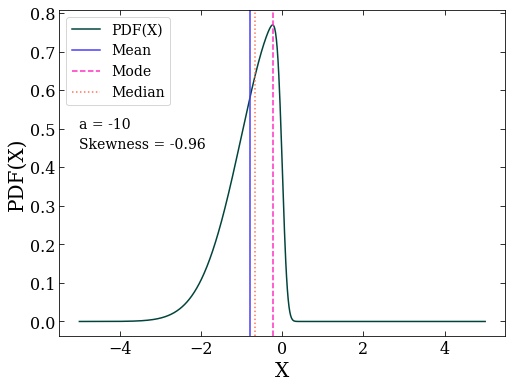

In [12]:
test_a = -10

# <your turn> : define variables and calculations you may need here.
x = np.linspace(-5,5,1000)
y = my_pdf(x,test_a)

# Initiating the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
# <your turn> : add your plotting commands here.
# Note: use the keyword "label" to name them. This allows the legend command to produce a clear legend.

ax.plot(x,y,label='PDF(X)',color=colorset[2])
ax.axvline(expectation_value(test_a),color=colorset[5],linestyle='-',label='Mean')
ax.axvline(mode(test_a),color=colorset[8],linestyle='--',label='Mode')
ax.axvline(quantile(test_a,0.5),color=colorset[10],linestyle=':',label='Median')

# A special addition: We're going to print the value of a and function's skewness on the plot
if type(skewness(test_a)) == float:
    ax.text(-5,0.5,f'a = {test_a}',fontsize=14)
    ax.text(-5,0.45,f'Skewness = {skewness(test_a):.2}',fontsize=14)

# Plot cosmetics - feel free to edit.
ax.legend(loc=2,fontsize=14)
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('PDF(X)', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='major', length=5)
ax.tick_params(axis='both', which='minor', length=2.5)
ax.tick_params(axis='both', which='both',direction='in',right=True,top=True);

#### Rerun the last cell, with different values of a and check how Mean, Mode, Median and skewness vary.

## You can now save the notebook and download it.